# Working with Dummy variables 

In [25]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [26]:
train=pd.read_csv('~/Desktop/Titanic/train.csv')

In [27]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Describe categorical variables

In [29]:
categorical=train.select_dtypes(include=['object'])

In [8]:
categorical.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cor, Mr. Liudevit",male,1601,G6,S
freq,1,577,7,4,644


### Check number of NaN values for attributes

In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Remove attributes like Ids or ones that have many NaNs

In [32]:
train1=train.drop(['PassengerId','Name', 'Cabin', 'Ticket'], axis=1)

### Fill NaNs with mean for Age attribute

In [33]:
import numpy as np

In [34]:
mean_age=np.average(train1.Age.dropna())
# this can also be done with train.Age.mean()

In [36]:
train1.Age.fillna(mean_age, inplace=True)

In [39]:
train1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [40]:
categorical.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Create Dummy variables from Sex and Embarked

In [41]:
dummies=pd.get_dummies(train[['Sex', 'Embarked']])

In [42]:
dummies.head(2)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0


### Drop original variables

In [45]:
train1.drop(labels=['Sex', 'Embarked'], axis=1, inplace=True)

In [46]:
train1.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22,1,0,7.2500
1,1,1,38,1,0,71.2833


### Join Numerical and Dummy variables

In [47]:
prepared=train1.join(dummies)

In [49]:
prepared.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,1,0,0


### Split Predictors and Label

In [52]:
y=prepared.Survived

In [56]:
X=prepared.drop('Survived', axis=1)

### Split on training and test

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_splittest_split(X,y, test_size=0.3, random_state=100)

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
RF=RandomForestClassifier(n_estimators=50)

In [80]:
rf_model=RF.fit(X_train, y_train)

In [117]:
rf_model.predict_proba(X_test)

array([[ 0.2       ,  0.8       ],
       [ 0.56      ,  0.44      ],
       [ 0.98      ,  0.02      ],
       [ 0.02      ,  0.98      ],
       [ 0.95      ,  0.05      ],
       [ 0.82      ,  0.18      ],
       [ 0.96      ,  0.04      ],
       [ 0.98      ,  0.02      ],
       [ 0.02      ,  0.98      ],
       [ 0.96      ,  0.04      ],
       [ 0.02      ,  0.98      ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.82      ,  0.18      ],
       [ 0.52      ,  0.48      ],
       [ 0.94      ,  0.06      ],
       [ 0.06      ,  0.94      ],
       [ 0.11      ,  0.89      ],
       [ 0.04      ,  0.96      ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 0.2       ,  0.8       ],
       [ 0.14      ,  0.86      ],
       [ 0.92      ,  0.08      ],
       [ 1.        ,  0.        ],
       [ 0.02      ,  0.98      ],
       [ 0.94      ,  0.06      ],
       [ 0.99      ,

### Make predictions on both train and test subsets

In [81]:
predictions_test= rf_model.predict(X_test)
predictions_train=rf_model.predict(X_train)

In [98]:
path=rf_model.decision_path(X_test)

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [88]:
roc_auc_score(y_train, predictions_train)

0.98757015516672175

In [89]:
roc_auc_score(y_test, predictions_test)

0.79294328082626508

In [126]:
probas=rf_model.predict_proba(X_test)[:,1]

In [125]:
fpr, tpr, thresholds = roc_curve(y_test, probas)

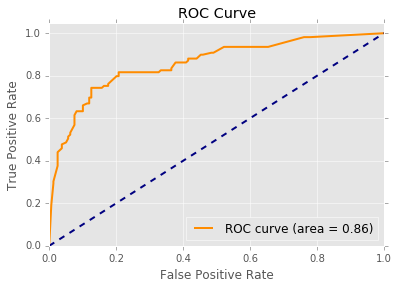

In [127]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#y_predict_probabilities = model.predict_proba(X_test)[:,1]

#fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Cross validation (model selection)

In [128]:
from sklearn.model_selection import cross_val_score

In [139]:
scores = cross_val_score(RF, X_train, y_train, cv=5, scoring='roc_auc')

In [141]:
np.average(scores)

0.85024787115443912

In [131]:
RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Optimize parameters

In [143]:
from sklearn.model_selection import GridSearchCV

In [148]:
params = [
  {'n_estimators': [20, 40, 100, 300, 500], 'max_depth': [5, 10, 15]}
 ]

In [156]:
 optimizer = GridSearchCV(RF, 
                   param_grid=params, 
                   scoring='roc_auc', cv=3,  
                   return_train_score=True, 
                   refit='roc_auc', n_jobs=2)

In [157]:
opt_rf=optimizer.fit(X_train,y_train)

In [159]:
opt_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [161]:
probas_opt=opt_rf.predict_proba(X_test)[:,1]

In [163]:
predictions_opt=opt_rf.predict(X_test)

In [164]:
roc_auc_score(y_test, predictions_opt)

0.79882868847729505